<a href="https://colab.research.google.com/github/badreldin2/UnpackAICourse/blob/main/SGD_MNIST_Putting_it_all_together.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THIS code is a summary of the code from the book FASTAI for practionersPractical deep learning for devlopers)
Chapter 4: MNIST basics 
https://colab.research.google.com/github/fastai/fastbook/blob/master/04_mnist_basics.ipynb

This code is to build a Gradient descent from Scratch based on the MNIST data set.
In this code we are only interested in identifying whether an image is more likely to be a 3 or a 7 ( limited set of the MNIST dataset)
As the code is dispersed along the text book with deeper explanation. I decided to put it all together in one block.

I strongly recommend to go through the whole chapter for more in depth explanation and keep this code as summary

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.9MB/s 
     |████████████████████████████████| 1.2MB 10.5MB/s 
     |████████████████████████████████| 194kB 14.4MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 12.8MB 27.8MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [4]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

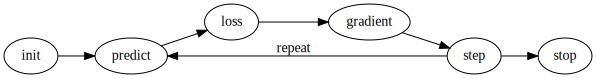

In [5]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

Initialization phase

In [6]:
#Load MNIST Data
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

#Specify Folders for Number 3 & 7
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

#Create Tensors for 3 & 7
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]


In [7]:
#prepare training DataSet
#Normalize the Tensors Limit the values between 0 to1
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
dset = list(zip(train_x,train_y))

In [8]:
#prepare Validation Dataset

#normalize
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

#Specify Dependent and Independent
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)

#Validation dataset
valid_dset = list(zip(valid_x,valid_y))

PARAMETERS

Based on the equation y=wx+b where w is a vector of weights, b biases Y is the  predicted result( Whether it is more likely to be a 3 or a 7) and x is the actual picture being presented to the model


In [9]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28,1))
bias = init_params(1)

The Model


In [11]:
#Initialize weights and Biases tensors
def linear1(xb): return xb@weights + bias

Loss Function

Helps us to identify how far away our predictions based on the current set of parameters are from the true values (the targets)

In [13]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [17]:
#put data into Dataloaders

dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)

valid_dl = DataLoader(valid_dset, batch_size=256)

Calculate the gradient of the parameters so we can modify them and get closer to the right targets

In [18]:
# calculate predictions followed by loss function and compute the gradient for parameters
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [19]:
# calculate predictions followed by loss function and compute the gradient for parameters
#Apply the learning rate
#Reset the gradients for the following epoch

def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [20]:
#Determines how many of the predictions are actually correct 
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [21]:
#Collects the accuracy from each element in the dataloader and displays it
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [22]:
#Bringing it all together
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.7304

In [24]:
#Running 20 epochs
for i in range(30):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.9681 0.9681 0.9676 0.9681 0.9686 0.9701 0.9706 0.9716 0.9721 0.9726 0.9731 0.9736 0.974 0.9736 0.9736 0.9736 0.9736 0.9736 0.9731 0.9731 0.9731 0.9736 0.974 0.9745 0.9745 0.9745 0.9745 0.9745 0.976 0.976 